# ds2s-OVの基本図

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV import ds2s_OV
from lib.funcs import *

In [2]:
L = 10.0  # レーンの長さ: 470m
n_0 = 5

x_0 = 0.15  # 最小車間距離: 車両の長さ+3mで換算
v_0 = 0.6  # 車両の最高速度: 法定速度100km/hで換算
dt = 1.0  # 時間差分1秒
dx = 0.1  # テキトー。基本図がいい感じになるように調整

In [3]:
ni, nf = 10000, 10100
data = {}
for id, K in enumerate(range(200)):
	print("\rid={}".format(id), end="")
	x_init = np.array([L / K * i for i in range(K)], dtype=np.float64)
	if K > 1: x_init[0] += (x_init[1] - x_init[0]) * 0.1
	model = ds2s_OV(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_init=x_init,
		n_max=nf+5,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "{ni} {nf}": model.flow(ni, nf) }
	data[id] = js

id=199

In [6]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data.values()]

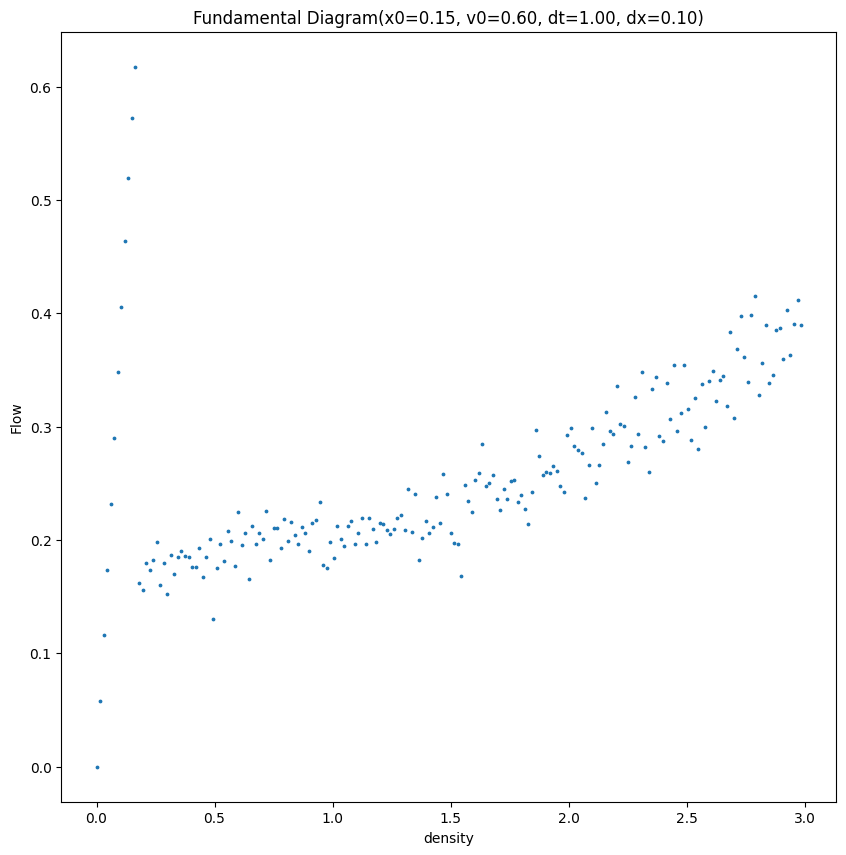

In [7]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Fundamental Diagram"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f})"
		.format(x_0, v_0, dt, dx)
)
plt.scatter(density, flow, s=3)
plt.show()

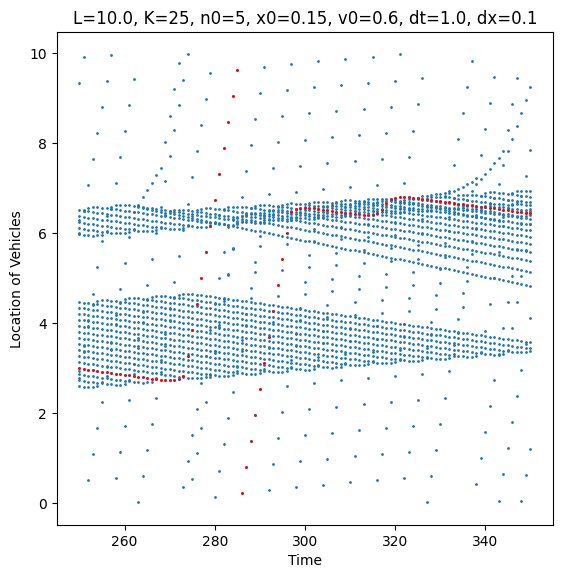

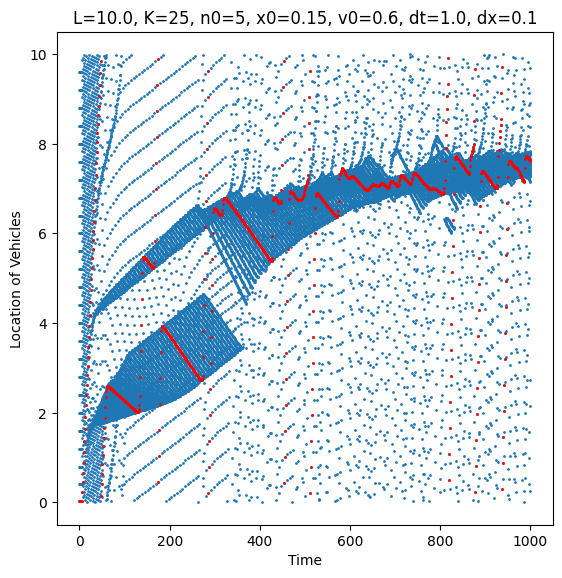

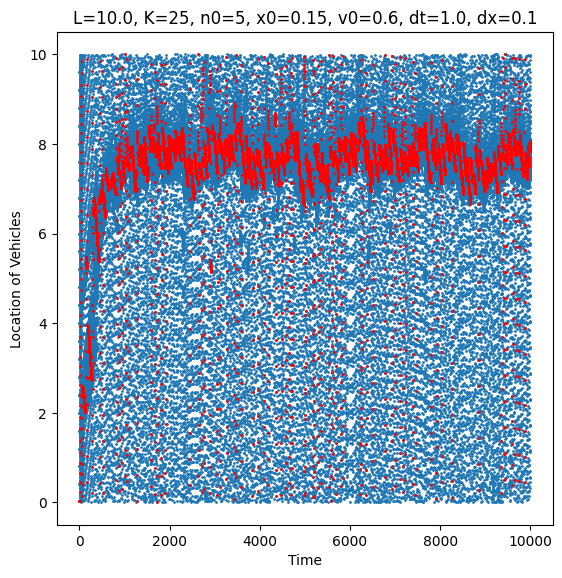

In [17]:
model = ds2s_OV.from_json(json=data[25], n_max=nf+5)
model.simulate()
plot_pattern(model, 250, 350)
plot_pattern(model, 0, 1000)
plot_pattern(model, 0, 10000)

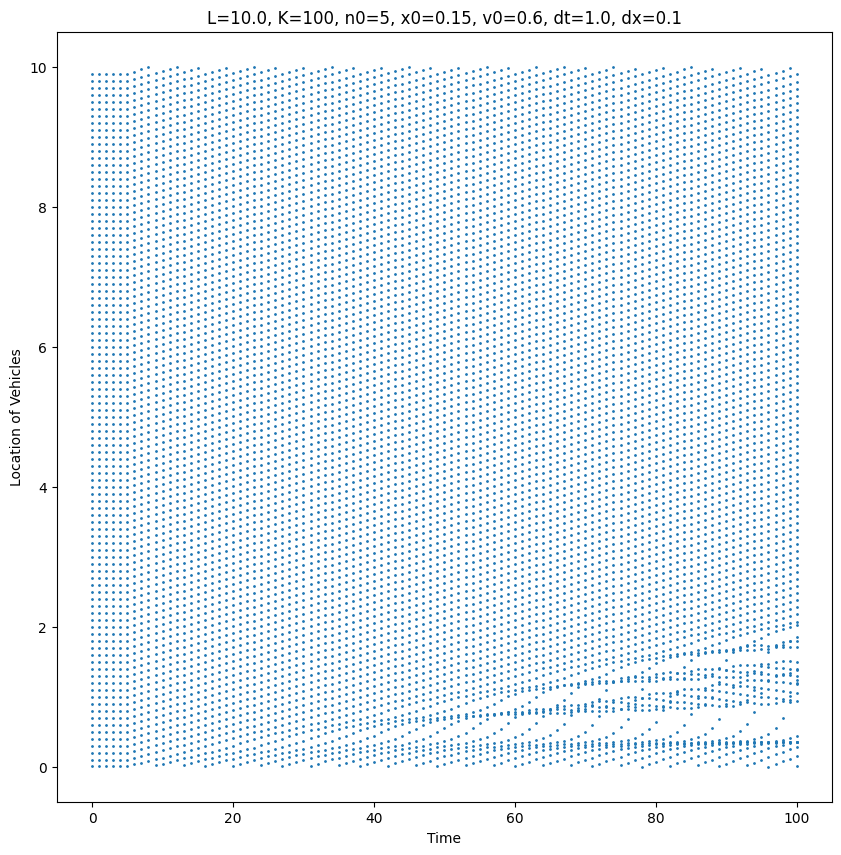

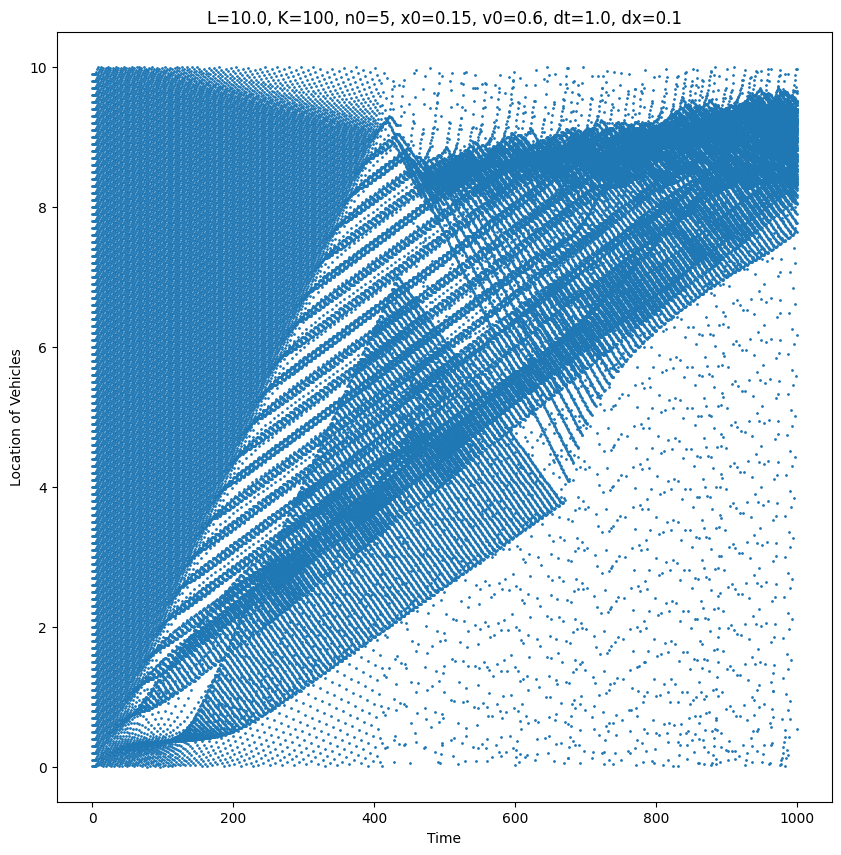

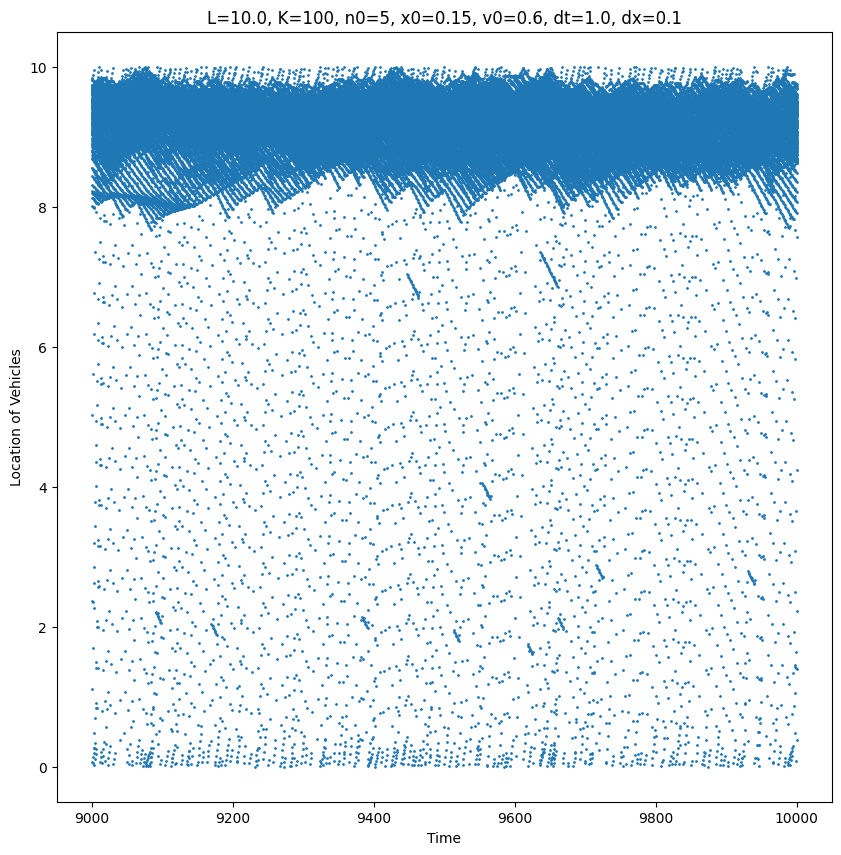

In [9]:
model = ds2s_OV.from_json(json=data[100], n_max=nf+5)
model.simulate()
plot_pattern_sort(model, 0, 100)
plot_pattern_sort(model, 0, 1000)
plot_pattern_sort(model, 9000, 10000)